In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip
import tensorflow.keras.layers as tfl
import seaborn as sns
from PIL import Image

# Preprocessing

In [2]:
df = pd.read_csv('../input/paddy-disease-classification/train.csv')
df.head()

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


Checking average age of each label

In [3]:
df.groupby('label').mean()

,age
label,
bacterial_leaf_blight,60.810021
bacterial_leaf_streak,62.986842
bacterial_panicle_blight,71.854599
blast,63.801496
brown_spot,64.981347
dead_heart,69.999307
downy_mildew,60.319355
hispa,62.098494
normal,62.056689


Plotting the count of each label

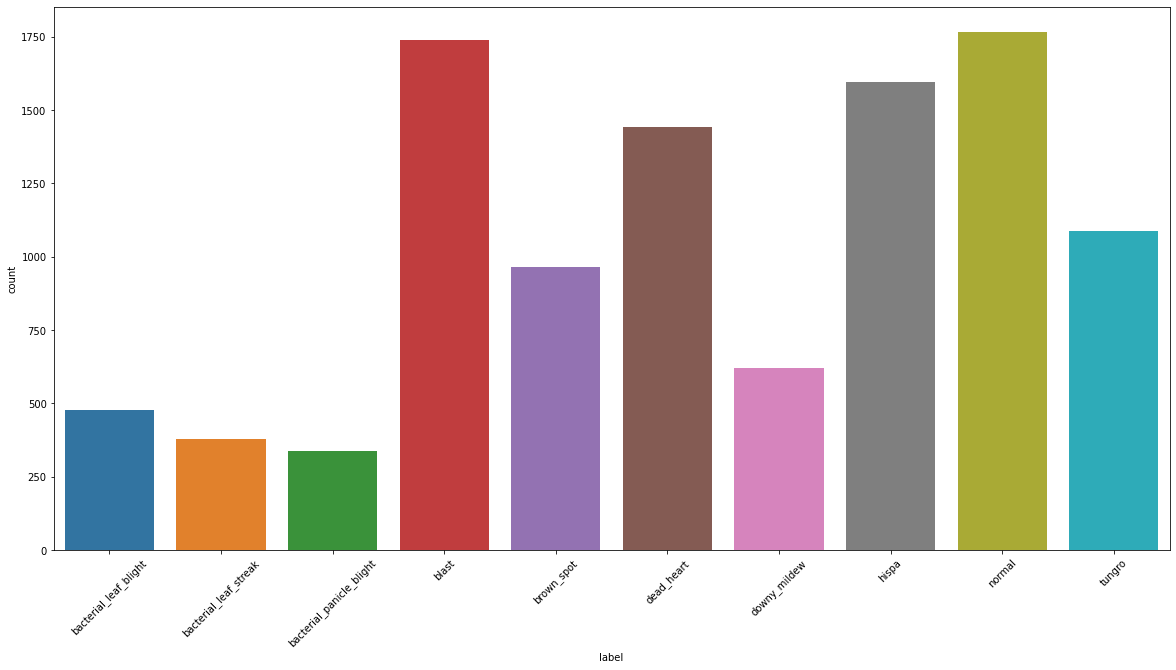

In [4]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x='label')
plt.xticks(rotation = 45)
plt.show()

Checking count of age groups

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


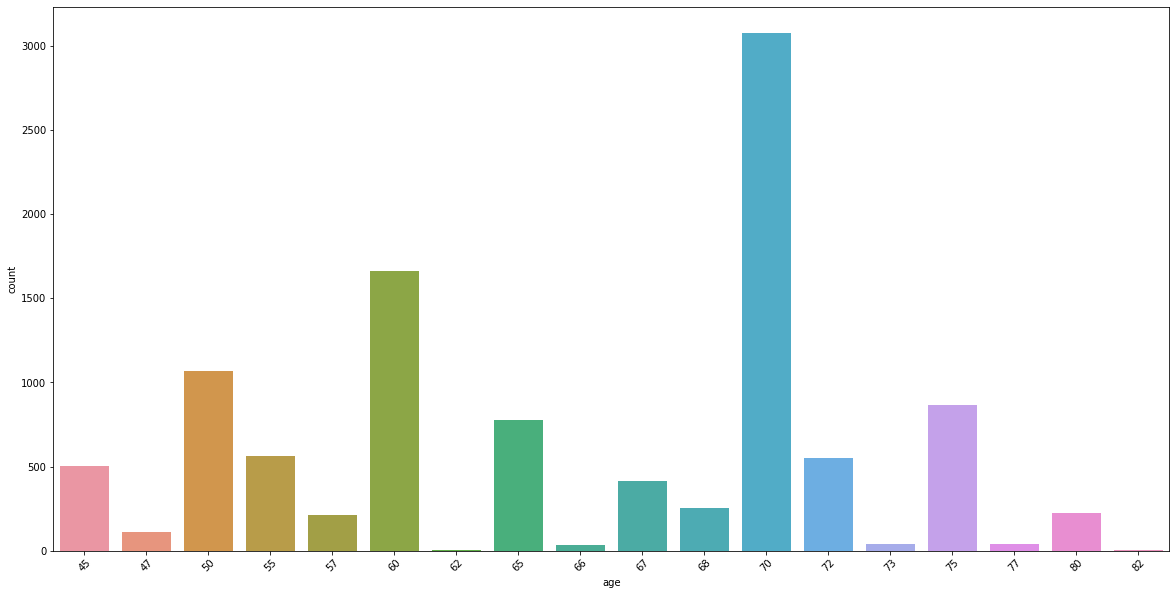

In [5]:
plt.figure(figsize=(20,10))
sns.countplot(df['age'])
plt.xticks(rotation = 45)
plt.show()

Checking images from each label

tungro


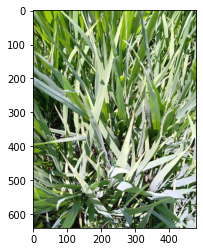

hispa


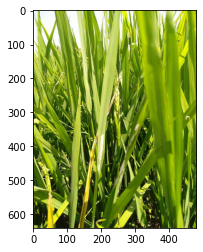

downy_mildew


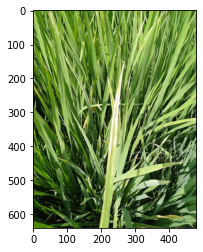

bacterial_leaf_streak


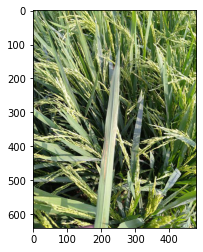

bacterial_leaf_blight


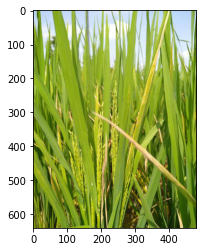

brown_spot


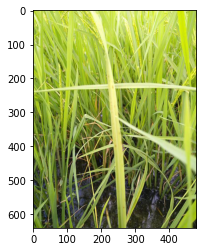

blast


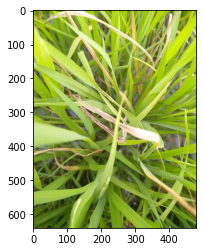

normal


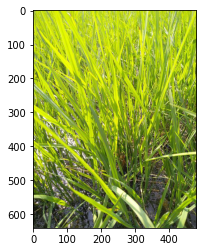

dead_heart


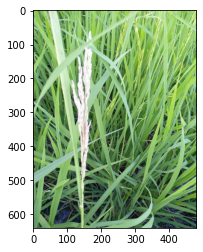

bacterial_panicle_blight


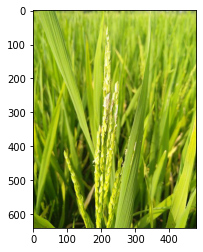

In [6]:
train_images = os.listdir('../input/paddy-disease-classification/train_images')
for folder in train_images :
    images = os.listdir('../input/paddy-disease-classification/train_images/'+str(folder))
    print(folder)
    img = mpimg.imread('../input/paddy-disease-classification/train_images/'+str(folder)+'/'+images[0])
    imgplot = plt.imshow(img)
    plt.show()

checking the resolution of a single image

In [7]:
train_path = '../input/paddy-disease-classification/train_images/bacterial_leaf_blight/'
from os import listdir
from os.path import isfile, join
files = [f for f in listdir(train_path) if isfile(join(train_path, f))]
import PIL
from PIL import Image
img = PIL.Image.open(train_path+str(files[0]))
wid, hgt = img.size
print(str(wid) + "x" + str(hgt))

480x640


Function to plot model history

In [4]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

In [ ]:
Accuracy = {}

# CNN model 1
1. 3 convolutional layers, filters = [64,32,32]
2. 4 Hidden Layers : [1024,512,128,64]

Accuracy obtained : 

In [ ]:
labels = os.listdir('../input/paddy-disease-classification/train_images')
img_size = 400
train_dataset = image_dataset_from_directory(
    '../input/paddy-disease-classification/train_images',
    image_size = (img_size,img_size),
    batch_size = 64,
    shuffle=True,
    labels='inferred',
    class_names = labels,
    label_mode = 'categorical',
    color_mode='rgb',
    validation_split = 0.1,
    subset='training',
    seed=22
)
val_dataset = image_dataset_from_directory(
    '../input/paddy-disease-classification/train_images',
    image_size = (img_size,img_size),
    batch_size = 64,
    shuffle=False,
    labels='inferred',
    class_names = labels,
    label_mode = 'categorical',
    color_mode='rgb',
    validation_split = 0.1,
    subset='validation',
    seed=22
)
model = tf.keras.models.Sequential([
    tfl.InputLayer(input_shape=(img_size,img_size,3)),
    tfl.Conv2D(filters=64,kernel_size=5,activation='relu'),
    tfl.MaxPool2D((2,2),2),
    tfl.Conv2D(filters=32,kernel_size=5,activation='relu'),
    tfl.MaxPool2D((2,2),2),
    tfl.Conv2D(filters=32,kernel_size=5,activation='relu'),
    tfl.MaxPool2D((2,2),2),
    tfl.Flatten(),
    tfl.Dense(1024,activation='relu'),
    tfl.Dense(512,activation='relu'),
    tfl.Dense(128,activation='relu'),
    tfl.Dense(64,activation='relu'),
    tfl.Dense(10,activation='softmax')
])
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=5,
                    verbose=1)
plot_loss_curves(history)
tf.keras.utils.plot_model(model, to_file='model.png',expand_nested=True,show_shapes=True)
Accuracy['CNN1'] = history.history['accuracy'][-1]

# CNN model 2

In [ ]:
labels = os.listdir('../input/paddy-disease-classification/train_images')
img_size = 400
train_dataset = image_dataset_from_directory(
    '../input/paddy-disease-classification/train_images',
    image_size = (img_size,img_size),
    batch_size = 64,
    shuffle=True,
    labels='inferred',
    class_names = labels,
    label_mode = 'categorical',
    color_mode='rgb',
    validation_split = 0.1,
    subset='training',
    seed=22
)
val_dataset = image_dataset_from_directory(
    '../input/paddy-disease-classification/train_images',
    image_size = (img_size,img_size),
    batch_size = 64,
    shuffle=False,
    labels='inferred',
    class_names = labels,
    label_mode = 'categorical',
    color_mode='rgb',
    validation_split = 0.1,
    subset='validation',
    seed=22
)
model = tf.keras.models.Sequential([
    tfl.InputLayer(input_shape=(img_size,img_size,3)),
    tfl.Conv2D(filters=32,kernel_size=3,activation='relu'),
    tfl.MaxPool2D((2,2),2),
    tfl.Conv2D(filters=32,kernel_size=3,activation='relu'),
    tfl.MaxPool2D((2,2),2),
    tfl.Flatten(),
    tfl.Dense(1024,activation='relu'),
    tfl.Dense(512,activation='relu'),
    tfl.Dense(128,activation='relu'),
    tfl.Dense(64,activation='relu'),
    tfl.Dense(10,activation='softmax')
])
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=5,
                    verbose=1)
plot_loss_curves(history)
tf.keras.utils.plot_model(model, to_file='model.png',expand_nested=True,show_shapes=True)
Accuracy['CNN2'] = history.history['accuracy'][-1]

# Transfer Learning

# MobileNetV2
1. input size  : 400
2. batch_size : 16
3. hidden layers : 4
4. introduced batch normalization
5. introduced dropout in the last hidden layer

Accuracy obtained : 96.61% 

In [ ]:
labels = os.listdir('../input/paddy-disease-classification/train_images')
img_size = 400
train_dataset = image_dataset_from_directory(
    '../input/paddy-disease-classification/train_images',
    image_size = (img_size,img_size),
    batch_size = 64,
    shuffle=True,
    labels='inferred',
    class_names = labels,
    label_mode = 'categorical',
    color_mode='rgb',
    validation_split = 0.1,
    subset='training',
    seed=22
)
val_dataset = image_dataset_from_directory(
    '../input/paddy-disease-classification/train_images',
    image_size = (img_size,img_size),
    batch_size = 64,
    shuffle=False,
    labels='inferred',
    class_names = labels,
    label_mode = 'categorical',
    color_mode='rgb',
    validation_split = 0.1,
    subset='validation',
    seed=22
)
def get_model(base, preprocessor, img_size):    
    inputs = tf.keras.Input(shape=(img_size,img_size,3))
    x = RandomFlip('horizontal')(inputs)
    x = preprocessor(x)
    x = base(x)
    x = tfl.Flatten()(x)
    x = tfl.Dense(1024, activation='relu')(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(512, activation='relu')(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(128, activation='relu')(x)
    x = tfl.Dropout(0.15)(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(64, activation='relu')(x)
    x = tfl.Dropout(0.3)(x)
    x = tfl.BatchNormalization()(x)
    outputs = tfl.Dense(10, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    return model
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
pre_trained_model = tf.keras.applications.MobileNetV2(input_shape=(img_size,img_size,3),
                                         include_top=False,
                                         weights='imagenet')
pre_trained_model.trainable = False
model = get_model(pre_trained_model, preprocess_input, img_size)
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=5,
                    verbose=1)
plot_loss_curves(history)
tf.keras.utils.plot_model(model, to_file='model.png',expand_nested=True,show_shapes=True)
Accuracy['MobileNet'] = history.history['accuracy'][-1]

# Resnet50
1. 4 hidden layers = [1024,512,128,64]
2. img_size = 400x400
3. introduced batch normalization and dropout

Accuracy obtained : 96.80%

In [ ]:
labels = os.listdir('../input/paddy-disease-classification/train_images')
img_size = 400
train_dataset = image_dataset_from_directory(
    '../input/paddy-disease-classification/train_images',
    image_size = (img_size,img_size),
    batch_size = 64,
    shuffle=True,
    labels='inferred',
    class_names = labels,
    label_mode = 'categorical',
    color_mode='rgb',
    validation_split = 0.1,
    subset='training',
    seed=22
)
val_dataset = image_dataset_from_directory(
    '../input/paddy-disease-classification/train_images',
    image_size = (img_size,img_size),
    batch_size = 64,
    shuffle=False,
    labels='inferred',
    class_names = labels,
    label_mode = 'categorical',
    color_mode='rgb',
    validation_split = 0.1,
    subset='validation',
    seed=22
)
def get_model(base, preprocessor, img_size):    
    inputs = tf.keras.Input(shape=(img_size,img_size,3))
    x = RandomFlip('horizontal')(inputs)
    x = preprocessor(x)
    x = base(x)
    x = tfl.Flatten()(x)
    x = tfl.Dense(1024, activation='relu')(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(512, activation='relu')(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(128, activation='relu')(x)
    x = tfl.Dropout(0.15)(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(64, activation='relu')(x)
    x = tfl.Dropout(0.3)(x)
    x = tfl.BatchNormalization()(x)
    outputs = tfl.Dense(10, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    return model
preprocess_input = tf.keras.applications.resnet.preprocess_input
pre_trained_model = tf.keras.applications.ResNet50(input_shape=(img_size,img_size,3),
                                         include_top=False,
                                         weights='imagenet')
pre_trained_model.trainable = False
model = get_model(pre_trained_model, preprocess_input, img_size)
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=5,
                    verbose=1)
plot_loss_curves(history)
# tf.keras.utils.plot_model(model, to_file='model.png',expand_nested=True,show_shapes=True)
Accuracy['ResNet'] = history.history['accuracy'][-1]

# Xception
1. 4 hidden layers = [1024,512,128,64]
2. img_size = 400x400
3. introduced batch normalization and dropout

Accuracy obtained : 

In [ ]:
labels = os.listdir('../input/paddy-disease-classification/train_images')
img_size = 400
train_dataset = image_dataset_from_directory(
    '../input/paddy-disease-classification/train_images',
    image_size = (img_size,img_size),
    batch_size = 64,
    shuffle=True,
    labels='inferred',
    class_names = labels,
    label_mode = 'categorical',
    color_mode='rgb',
    validation_split = 0.1,
    subset='training',
    seed=22
)
val_dataset = image_dataset_from_directory(
    '../input/paddy-disease-classification/train_images',
    image_size = (img_size,img_size),
    batch_size = 64,
    shuffle=False,
    labels='inferred',
    class_names = labels,
    label_mode = 'categorical',
    color_mode='rgb',
    validation_split = 0.1,
    subset='validation',
    seed=22
)
def get_model(base, preprocessor, img_size):    
    inputs = tf.keras.Input(shape=(img_size,img_size,3))
    x = RandomFlip('horizontal')(inputs)
    x = preprocessor(x)
    x = base(x)
    x = tfl.Flatten()(x)
    x = tfl.Dense(1024, activation='relu')(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(512, activation='relu')(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(128, activation='relu')(x)
    x = tfl.Dropout(0.15)(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(64, activation='relu')(x)
    x = tfl.Dropout(0.3)(x)
    x = tfl.BatchNormalization()(x)
    outputs = tfl.Dense(10, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    return model
preprocess_input = tf.keras.applications.xception.preprocess_input
pre_trained_model = tf.keras.applications.Xception(input_shape=(img_size,img_size,3),
                                         include_top=False,
                                         weights='imagenet')
pre_trained_model.trainable = False
model = get_model(pre_trained_model, preprocess_input, img_size)
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=5,
                    verbose=1)
plot_loss_curves(history)
# tf.keras.utils.plot_model(model, to_file='model.png',expand_nested=True,show_shapes=True)
Accuracy['Xception'] = history.history['accuracy'][-1]

# InceptionV3
1. 4 hidden layers = [1024,512,128,64]
2. img_size = 400x400
3. introduced batch normalization and dropout

Accuracy obtained : 

In [ ]:
labels = os.listdir('../input/paddy-disease-classification/train_images')
img_size = 400
train_dataset = image_dataset_from_directory(
    '../input/paddy-disease-classification/train_images',
    image_size = (img_size,img_size),
    batch_size = 64,
    shuffle=True,
    labels='inferred',
    class_names = labels,
    label_mode = 'categorical',
    color_mode='rgb',
    validation_split = 0.1,
    subset='training',
    seed=22
)
val_dataset = image_dataset_from_directory(
    '../input/paddy-disease-classification/train_images',
    image_size = (img_size,img_size),
    batch_size = 64,
    shuffle=False,
    labels='inferred',
    class_names = labels,
    label_mode = 'categorical',
    color_mode='rgb',
    validation_split = 0.1,
    subset='validation',
    seed=22
)
def get_model(base, preprocessor, img_size):    
    inputs = tf.keras.Input(shape=(img_size,img_size,3))
    x = RandomFlip('horizontal')(inputs)
    x = preprocessor(x)
    x = base(x)
    x = tfl.Flatten()(x)
    x = tfl.Dense(1024, activation='relu')(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(512, activation='relu')(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(128, activation='relu')(x)
    x = tfl.Dropout(0.15)(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(64, activation='relu')(x)
    x = tfl.Dropout(0.3)(x)
    x = tfl.BatchNormalization()(x)
    outputs = tfl.Dense(10, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    return model
preprocess_input = tf.keras.applications.inception_v3.preprocess_input
pre_trained_model = tf.keras.applications.InceptionV3(input_shape=(img_size,img_size,3),
                                         include_top=False,
                                         weights='imagenet')
pre_trained_model.trainable = False
model = get_model(pre_trained_model, preprocess_input, img_size)
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=5,
                    verbose=1)
plot_loss_curves(history)
# tf.keras.utils.plot_model(model, to_file='model.png',expand_nested=True,show_shapes=True)
Accuracy['Inception'] = history.history['accuracy'][-1]

# EfficientNet V2
1. 4 hidden layers = [1024,512,128,64]
2. img_size = 400x400
3. introduced batch normalization and dropout

Accuracy obtained : 

In [ ]:
labels = os.listdir('../input/paddy-disease-classification/train_images')
img_size = 400
train_dataset = image_dataset_from_directory(
    '../input/paddy-disease-classification/train_images',
    image_size = (img_size,img_size),
    batch_size = 64,
    shuffle=True,
    labels='inferred',
    class_names = labels,
    label_mode = 'categorical',
    color_mode='rgb',
    validation_split = 0.1,
    subset='training',
    seed=22
)
val_dataset = image_dataset_from_directory(
    '../input/paddy-disease-classification/train_images',
    image_size = (img_size,img_size),
    batch_size = 64,
    shuffle=False,
    labels='inferred',
    class_names = labels,
    label_mode = 'categorical',
    color_mode='rgb',
    validation_split = 0.1,
    subset='validation',
    seed=22
)
def get_model(base, preprocessor, img_size):    
    inputs = tf.keras.Input(shape=(img_size,img_size,3))
    x = RandomFlip('horizontal')(inputs)
    x = preprocessor(x)
    x = base(x)
    x = tfl.Flatten()(x)
    x = tfl.Dense(1024, activation='relu')(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(512, activation='relu')(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(128, activation='relu')(x)
    x = tfl.Dropout(0.15)(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(64, activation='relu')(x)
    x = tfl.Dropout(0.3)(x)
    x = tfl.BatchNormalization()(x)
    outputs = tfl.Dense(10, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    return model
preprocess_input = tf.keras.applications.efficientnet.preprocess_input
pre_trained_model = tf.keras.applications.EfficientNetB5(input_shape=(img_size,img_size,3),
                                         include_top=False,
                                         weights='imagenet')
pre_trained_model.trainable = False
model = get_model(pre_trained_model, preprocess_input, img_size)
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=5,
                    verbose=1)
plot_loss_curves(history)
# tf.keras.utils.plot_model(model, to_file='model.png',expand_nested=True,show_shapes=True)
Accuracy['EfficientNet'] = history.history['accuracy'][-1]

Accuracies of the models

In [ ]:
plt.ylim(min(Accuracy.values())-0.2,1)
plt.bar(list(Accuracy.keys()),list(Accuracy.values()))
plt.show()

## Submission

Found 10407 files belonging to 10 classes.
Using 9367 files for training.


2022-05-01 08:45:41.839788: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-01 08:45:41.929024: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-01 08:45:41.929821: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-01 08:45:41.934611: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Found 10407 files belonging to 10 classes.
Using 1040 files for validation.
9420800/9406464 [==============================] - 0s 0us/step
Epoch 1/5


2022-05-01 08:45:49.833407: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-01 08:45:54.567114: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


147/147 [==============================] - 75s 422ms/step - loss: 1.3274 - accuracy: 0.5703 - val_loss: 1.0078 - val_accuracy: 0.6298
Epoch 2/5
147/147 [==============================] - 52s 338ms/step - loss: 0.5216 - accuracy: 0.8510 - val_loss: 0.3120 - val_accuracy: 0.9010
Epoch 3/5
147/147 [==============================] - 51s 337ms/step - loss: 0.2983 - accuracy: 0.9157 - val_loss: 0.1648 - val_accuracy: 0.9548
Epoch 4/5
147/147 [==============================] - 51s 333ms/step - loss: 0.1807 - accuracy: 0.9537 - val_loss: 0.1269 - val_accuracy: 0.9683
Epoch 5/5
147/147 [==============================] - 52s 342ms/step - loss: 0.1167 - accuracy: 0.9689 - val_loss: 0.1165 - val_accuracy: 0.9673


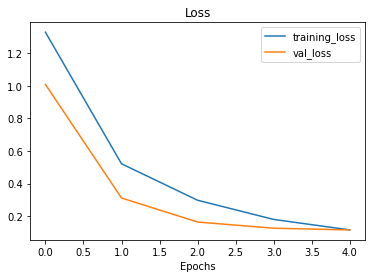

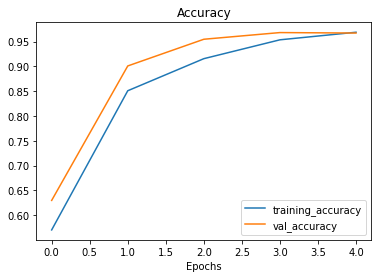

In [5]:
labels = os.listdir('../input/paddy-disease-classification/train_images')
img_size = 400
train_dataset = image_dataset_from_directory(
    '../input/paddy-disease-classification/train_images',
    image_size = (img_size,img_size),
    batch_size = 64,
    shuffle=True,
    labels='inferred',
    class_names = labels,
    label_mode = 'categorical',
    color_mode='rgb',
    validation_split = 0.1,
    subset='training',
    seed=22
)
val_dataset = image_dataset_from_directory(
    '../input/paddy-disease-classification/train_images',
    image_size = (img_size,img_size),
    batch_size = 64,
    shuffle=False,
    labels='inferred',
    class_names = labels,
    label_mode = 'categorical',
    color_mode='rgb',
    validation_split = 0.1,
    subset='validation',
    seed=22
)
def get_model(base, preprocessor, img_size):    
    inputs = tf.keras.Input(shape=(img_size,img_size,3))
    x = RandomFlip('horizontal')(inputs)
    x = preprocessor(x)
    x = base(x)
    x = tfl.Flatten()(x)
    x = tfl.Dense(1024, activation='relu')(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(512, activation='relu')(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(128, activation='relu')(x)
    x = tfl.Dropout(0.15)(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(64, activation='relu')(x)
    x = tfl.Dropout(0.3)(x)
    x = tfl.BatchNormalization()(x)
    outputs = tfl.Dense(10, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    return model
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
pre_trained_model = tf.keras.applications.MobileNetV2(input_shape=(img_size,img_size,3),
                                         include_top=False,
                                         weights='imagenet')
pre_trained_model.trainable = False
model = get_model(pre_trained_model, preprocess_input, img_size)
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=5,
                    verbose=1)
plot_loss_curves(history)

In [6]:
test_dataset = image_dataset_from_directory(    
    '../input/paddy-disease-classification/test_images',
    image_size = (img_size,img_size),
    batch_size = 64,
    shuffle=False,
    labels=None,
    class_names = None,
    label_mode = None,
    color_mode='rgb',
)
predictions = model.predict(test_dataset)
predictions.shape

Found 3469 files belonging to 1 classes.


(3469, 10)

In [7]:
ss = pd.read_csv('../input/paddy-disease-classification/sample_submission.csv')
ss['label'] = np.argmax(predictions, axis=-1)
ss['label'] = ss['label'].replace([0,1,2,3,4,5,6,7,8,9], labels)
ss.to_csv("Submission.csv",index=False)
ss.head()

,image_id,label
0,200001.jpg,dead_heart
1,200002.jpg,normal
2,200003.jpg,blast
3,200004.jpg,blast
4,200005.jpg,blast
